**IMPORTING LIBRARIES**

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
import seaborn as sns

**LOAD THE DATASET**

In [4]:

df =  pd.read_csv(r"/content/water_dataX .csv", encoding = 'unicode_escape')


In [5]:
df.head()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [6]:
df.fillna(0, inplace=True)

In [7]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [8]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [9]:
df.columns

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'D.O. (mg/l)', 'PH',
       'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)',
       'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)',
       'TOTAL COLIFORM (MPN/100ml)Mean', 'year'],
      dtype='object')

In [10]:
df['Temp'] = pd.to_numeric(df['Temp'], errors = 'coerce')
df['D.O. (mg/l)'] = pd.to_numeric(df['D.O. (mg/l)'], errors = 'coerce')
df['PH'] = pd.to_numeric(df['PH'], errors='coerce')
df['B.O.D. (mg/l)'] = pd.to_numeric(df['B.O.D. (mg/l)'], errors='coerce')
df['CONDUCTIVITY (µmhos/cm)'] = pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'], errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)'] = pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean'] = pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')

In [11]:
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [12]:
start = 1
end = 1779
station = df.iloc[start:end, 0]
location = df.iloc[start:end ,1]
state = df.iloc[start:end, 2]
do = df.iloc[start:end, 4].astype(np.float64)

value=0

ph = df.iloc[ start:end, 5]  
co = df.iloc [start:end, 6].astype(np.float64)   
  
year = df.iloc[start:end, 11]
tc = df.iloc[2:end, 10].astype(np.float64)


bod = df.iloc[start:end, 7].astype(np.float64)
na = df.iloc[start:end, 8].astype(np.float64)
na.dtype

dtype('float64')

In [13]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500.0,2014


In [14]:
df = pd.concat([station,location,state,do,ph,co,bod,na,tc,year], axis=1)

df.columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [15]:
df.head()

,station,location,state,do,ph,co,bod,na,tc,year
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.2,NaN,2014
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014


In [16]:
#calulation of Ph
df['npH']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [17]:
#calculation of dissolved oxygen
df['ndo']=df.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [18]:
#calculation of total coliform
df['nco']=df.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [19]:
#calc of B.D.O
df['nbdo']=df.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [20]:
#calculation of electrical conductivity
df['nec']=df.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [21]:
#Calulation of nitrate
df['nna']=df.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [22]:
df.head()

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.2,NaN,2014,100,80,0,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,100,80,40,100,80,100
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,100,80,40,100,80,100


In [23]:
df.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [24]:
df['wph']=df.npH * 0.165
df['wdo']=df.ndo * 0.281
df['wbdo']=df.nbdo * 0.234
df['wec']=df.nec* 0.009
df['wna']=df.nna * 0.028
df['wco']=df.nco * 0.281

In [25]:
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco 

In [26]:
df.head()

,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.2,NaN,2014,...,100,60,100,16.5,22.48,23.40,0.54,2.8,0.00,65.72
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [27]:
ag = df.groupby('year').mean()

In [28]:
ag.head()

,do,ph,co,bod,na,tc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
year,,,,,,,,,,,,,,,,,,,
2006,6.339856,7.247588,1604.124000,13.338644,1.897361,9694.549451,81.568627,85.294118,40.784314,83.333333,29.411765,94.901961,13.458824,23.967647,19.500000,0.264706,2.657255,11.460392,71.308824
2007,6.348276,7.221667,1919.794872,8.295763,1.262653,31240.188073,83.333333,87.666667,39.000000,87.666667,45.000000,81.666667,13.750000,24.634333,20.514000,0.405000,2.286667,10.959000,72.549000
2008,6.163057,7.105660,1361.647799,5.630449,1.488936,20428.894040,75.974843,85.786164,43.144654,89.182390,50.817610,88.553459,12.535849,24.105912,20.868679,0.457358,2.479497,12.123648,72.570943
2009,6.310912,7.203425,3192.172944,6.532222,2.485864,5099.593567,79.779006,87.624309,44.972376,89.171271,33.922652,88.950276,13.163536,24.622431,20.866077,0.305304,2.490608,12.637238,74.085193
2010,6.350053,7.201436,1957.287234,7.670934,1.704828,3586.397661,79.574468,90.531915,45.212766,87.021277,47.021277,92.446809,13.129787,25.439468,20.362979,0.423191,2.588511,12.704787,74.648723


In [29]:
df = ag.reset_index(level = 0, inplace = False)
df.head()

,year,do,ph,co,bod,na,tc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,2006,6.339856,7.247588,1604.124000,13.338644,1.897361,9694.549451,81.568627,85.294118,40.784314,83.333333,29.411765,94.901961,13.458824,23.967647,19.500000,0.264706,2.657255,11.460392,71.308824
1,2007,6.348276,7.221667,1919.794872,8.295763,1.262653,31240.188073,83.333333,87.666667,39.000000,87.666667,45.000000,81.666667,13.750000,24.634333,20.514000,0.405000,2.286667,10.959000,72.549000
2,2008,6.163057,7.105660,1361.647799,5.630449,1.488936,20428.894040,75.974843,85.786164,43.144654,89.182390,50.817610,88.553459,12.535849,24.105912,20.868679,0.457358,2.479497,12.123648,72.570943
3,2009,6.310912,7.203425,3192.172944,6.532222,2.485864,5099.593567,79.779006,87.624309,44.972376,89.171271,33.922652,88.950276,13.163536,24.622431,20.866077,0.305304,2.490608,12.637238,74.085193
4,2010,6.350053,7.201436,1957.287234,7.670934,1.704828,3586.397661,79.574468,90.531915,45.212766,87.021277,47.021277,92.446809,13.129787,25.439468,20.362979,0.423191,2.588511,12.704787,74.648723


In [30]:
year = df['year'].values
AQI = df['wqi'].values
df['wqi'] = pd.to_numeric(df['wqi'], errors = 'coerce')
df['wqi'] = pd.to_numeric(df['wqi'], errors = 'coerce')

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [32]:
from mpl_toolkits.mplot3d import Axes3D

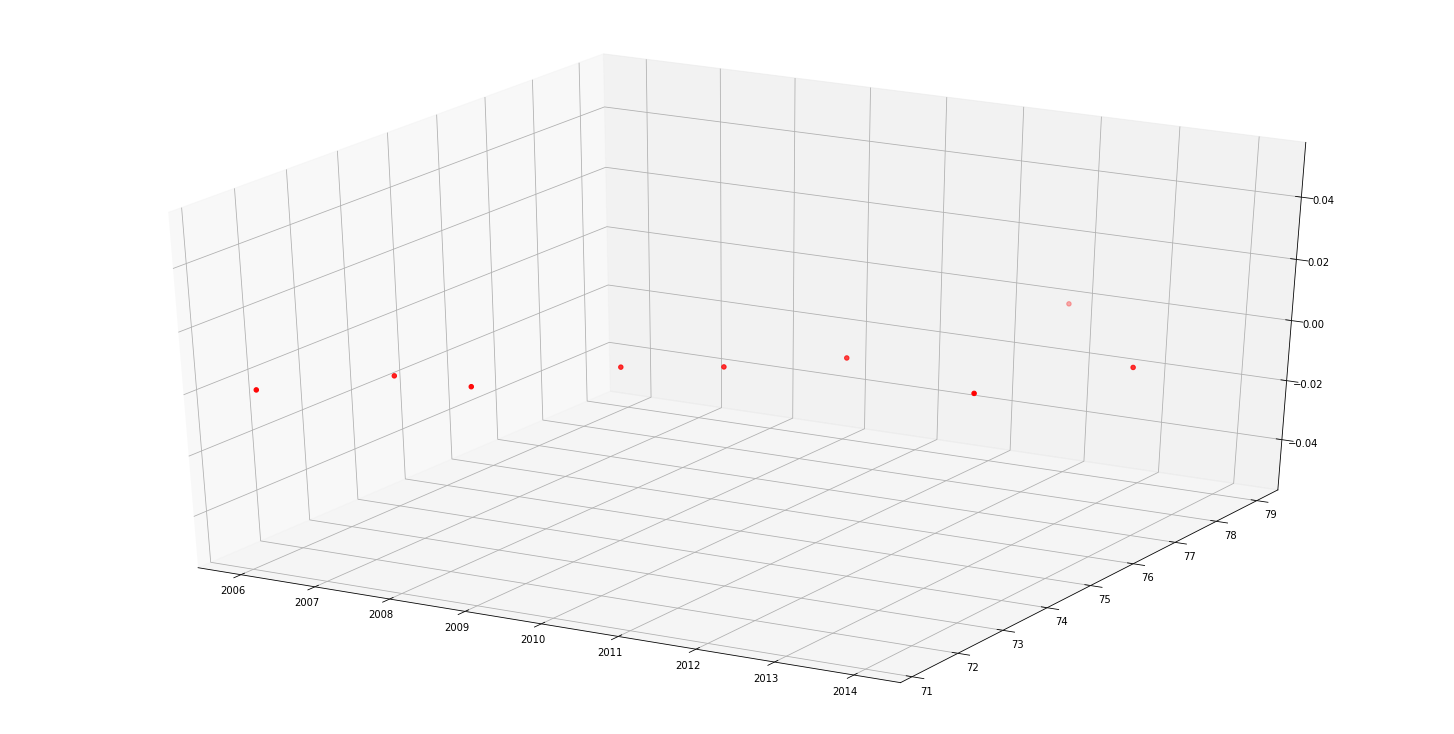

In [33]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year, AQI, color = 'red')
plt.show()

In [34]:
df

,year,do,ph,co,bod,na,tc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,2006,6.339856,7.247588,1604.124000,13.338644,1.897361,9.694549e+03,81.568627,85.294118,40.784314,83.333333,29.411765,94.901961,13.458824,23.967647,19.500000,0.264706,2.657255,11.460392,71.308824
1,2007,6.348276,7.221667,1919.794872,8.295763,1.262653,3.124019e+04,83.333333,87.666667,39.000000,87.666667,45.000000,81.666667,13.750000,24.634333,20.514000,0.405000,2.286667,10.959000,72.549000
2,2008,6.163057,7.105660,1361.647799,5.630449,1.488936,2.042889e+04,75.974843,85.786164,43.144654,89.182390,50.817610,88.553459,12.535849,24.105912,20.868679,0.457358,2.479497,12.123648,72.570943
3,2009,6.310912,7.203425,3192.172944,6.532222,2.485864,5.099594e+03,79.779006,87.624309,44.972376,89.171271,33.922652,88.950276,13.163536,24.622431,20.866077,0.305304,2.490608,12.637238,74.085193
4,2010,6.350053,7.201436,1957.287234,7.670934,1.704828,3.586398e+03,79.574468,90.531915,45.212766,87.021277,47.021277,92.446809,13.129787,25.439468,20.362979,0.423191,2.588511,12.704787,74.648723
5,2011,6.227706,7.297403,2351.420346,6.464574,1.530588,2.734490e+03,88.138528,88.225108,47.792208,86.320346,46.406926,80.952381,14.542857,24.791255,20.198961,0.417662,2.266667,13.429610,75.647013
6,2012,6.632534,7.298973,1401.078767,5.468621,1.564413,1.071750e+06,92.260274,90.684932,50.205479,91.027397,54.109589,84.589041,15.222945,25.482466,21.300411,0.486986,2.368493,14.107740,78.969041
7,2013,6.314741,7.187160,1564.531496,5.197638,1.728101,6.688336e+05,85.977011,86.436782,45.057471,88.199234,51.877395,98.850575,14.186207,24.288736,20.638621,0.466897,2.767816,12.661149,75.009425
8,2014,6.251883,7.217284,1819.533333,5.288655,1.528807,2.190088e+06,88.852459,87.049180,48.442623,89.098361,51.639344,99.508197,14.660656,24.460820,20.849016,0.464754,2.786230,13.612377,76.833852


In [35]:
df = df[np.isfinite(df['wqi'])]
df.head()

,year,do,ph,co,bod,na,tc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,2006,6.339856,7.247588,1604.124000,13.338644,1.897361,9694.549451,81.568627,85.294118,40.784314,83.333333,29.411765,94.901961,13.458824,23.967647,19.500000,0.264706,2.657255,11.460392,71.308824
1,2007,6.348276,7.221667,1919.794872,8.295763,1.262653,31240.188073,83.333333,87.666667,39.000000,87.666667,45.000000,81.666667,13.750000,24.634333,20.514000,0.405000,2.286667,10.959000,72.549000
2,2008,6.163057,7.105660,1361.647799,5.630449,1.488936,20428.894040,75.974843,85.786164,43.144654,89.182390,50.817610,88.553459,12.535849,24.105912,20.868679,0.457358,2.479497,12.123648,72.570943
3,2009,6.310912,7.203425,3192.172944,6.532222,2.485864,5099.593567,79.779006,87.624309,44.972376,89.171271,33.922652,88.950276,13.163536,24.622431,20.866077,0.305304,2.490608,12.637238,74.085193
4,2010,6.350053,7.201436,1957.287234,7.670934,1.704828,3586.397661,79.574468,90.531915,45.212766,87.021277,47.021277,92.446809,13.129787,25.439468,20.362979,0.423191,2.588511,12.704787,74.648723


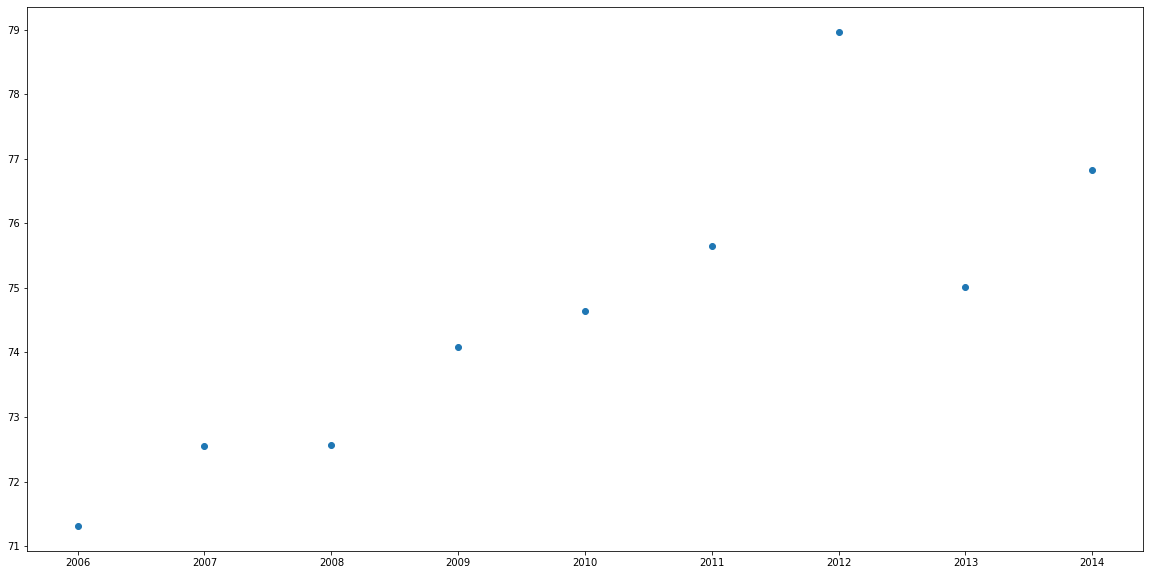

In [36]:
cols = ['year']
y = df['wqi']
x = df[cols]

plt.scatter(x, y)
plt.show()

In [37]:
from sklearn import neighbors, datasets
df = df.reset_index(level = 0, inplace = False)
df

,index,year,do,ph,co,bod,na,tc,npH,ndo,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,0,2006,6.339856,7.247588,1604.124000,13.338644,1.897361,9.694549e+03,81.568627,85.294118,...,83.333333,29.411765,94.901961,13.458824,23.967647,19.500000,0.264706,2.657255,11.460392,71.308824
1,1,2007,6.348276,7.221667,1919.794872,8.295763,1.262653,3.124019e+04,83.333333,87.666667,...,87.666667,45.000000,81.666667,13.750000,24.634333,20.514000,0.405000,2.286667,10.959000,72.549000
2,2,2008,6.163057,7.105660,1361.647799,5.630449,1.488936,2.042889e+04,75.974843,85.786164,...,89.182390,50.817610,88.553459,12.535849,24.105912,20.868679,0.457358,2.479497,12.123648,72.570943
3,3,2009,6.310912,7.203425,3192.172944,6.532222,2.485864,5.099594e+03,79.779006,87.624309,...,89.171271,33.922652,88.950276,13.163536,24.622431,20.866077,0.305304,2.490608,12.637238,74.085193
4,4,2010,6.350053,7.201436,1957.287234,7.670934,1.704828,3.586398e+03,79.574468,90.531915,...,87.021277,47.021277,92.446809,13.129787,25.439468,20.362979,0.423191,2.588511,12.704787,74.648723
5,5,2011,6.227706,7.297403,2351.420346,6.464574,1.530588,2.734490e+03,88.138528,88.225108,...,86.320346,46.406926,80.952381,14.542857,24.791255,20.198961,0.417662,2.266667,13.429610,75.647013
6,6,2012,6.632534,7.298973,1401.078767,5.468621,1.564413,1.071750e+06,92.260274,90.684932,...,91.027397,54.109589,84.589041,15.222945,25.482466,21.300411,0.486986,2.368493,14.107740,78.969041
7,7,2013,6.314741,7.187160,1564.531496,5.197638,1.728101,6.688336e+05,85.977011,86.436782,...,88.199234,51.877395,98.850575,14.186207,24.288736,20.638621,0.466897,2.767816,12.661149,75.009425
8,8,2014,6.251883,7.217284,1819.533333,5.288655,1.528807,2.190088e+06,88.852459,87.049180,...,89.098361,51.639344,99.508197,14.660656,24.460820,20.849016,0.464754,2.786230,13.612377,76.833852


In [38]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [39]:
cols=['year']
df.head()

,index,year,do,ph,co,bod,na,tc,npH,ndo,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,0,2006,6.339856,7.247588,1604.124000,13.338644,1.897361,9694.549451,81.568627,85.294118,...,83.333333,29.411765,94.901961,13.458824,23.967647,19.500000,0.264706,2.657255,11.460392,71.308824
1,1,2007,6.348276,7.221667,1919.794872,8.295763,1.262653,31240.188073,83.333333,87.666667,...,87.666667,45.000000,81.666667,13.750000,24.634333,20.514000,0.405000,2.286667,10.959000,72.549000
2,2,2008,6.163057,7.105660,1361.647799,5.630449,1.488936,20428.894040,75.974843,85.786164,...,89.182390,50.817610,88.553459,12.535849,24.105912,20.868679,0.457358,2.479497,12.123648,72.570943
3,3,2009,6.310912,7.203425,3192.172944,6.532222,2.485864,5099.593567,79.779006,87.624309,...,89.171271,33.922652,88.950276,13.163536,24.622431,20.866077,0.305304,2.490608,12.637238,74.085193
4,4,2010,6.350053,7.201436,1957.287234,7.670934,1.704828,3586.397661,79.574468,90.531915,...,87.021277,47.021277,92.446809,13.129787,25.439468,20.362979,0.423191,2.588511,12.704787,74.648723


In [40]:
y = df['wqi']
x = df[cols]

In [41]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [42]:
reg.fit(x_train, y_train)

LinearRegression()

In [43]:
a = reg.predict(x_test)
a

array([73.85895419, 74.59338162])

In [44]:
y_test

3    74.085193
4    74.648723
Name: wqi, dtype: float64

In [45]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:0.03


In [46]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a})

In [47]:
#using gradient descent to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.46059349],
       [ 1.        , -1.09544512],
       [ 1.        , -0.73029674],
       [ 1.        , -0.36514837],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.36514837],
       [ 1.        ,  0.73029674],
       [ 1.        ,  1.09544512],
       [ 1.        ,  1.46059349]])

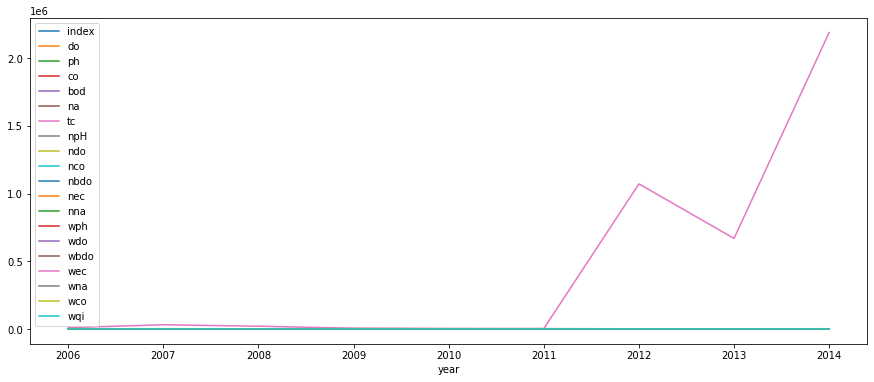

In [48]:
import matplotlib.pyplot as plt
df=df.set_index('year')
df.plot(figsize=(15,6))
plt.show()

In [49]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 74.62, 2.00


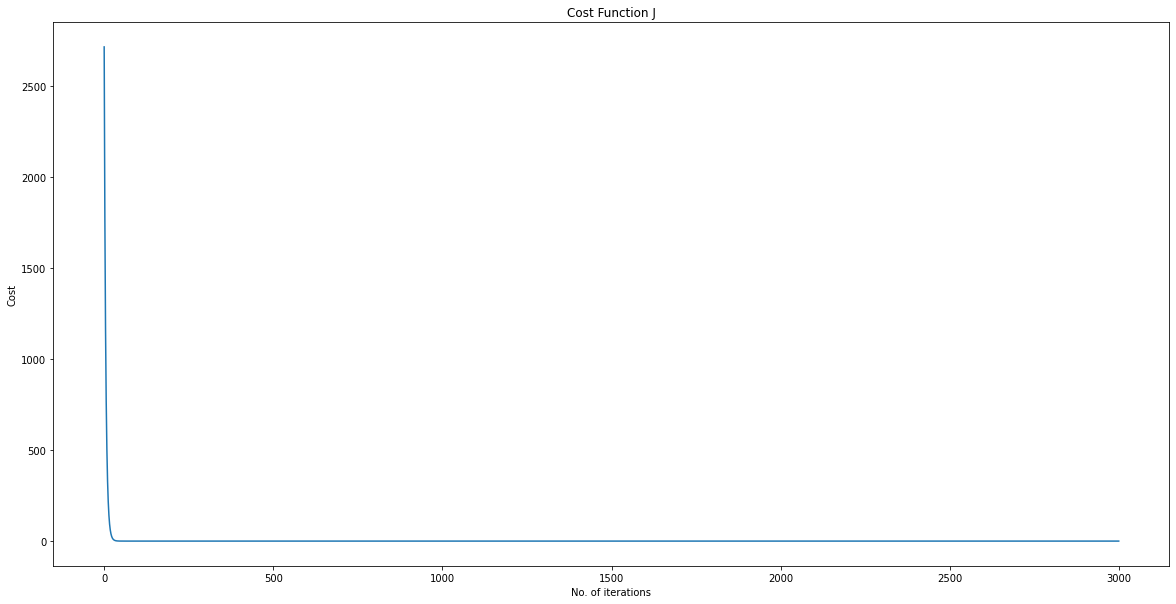

In [50]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [51]:
import numpy as np
newB=[74.76, 2.13]

In [52]:
def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse

In [53]:
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([df, dt], axis=1)
dt

,index,do,ph,co,bod,na,tc,npH,ndo,nco,...,nna,wph,wdo,wbdo,wec,wna,wco,wqi,Actual,Predicted
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.308824,71.648936
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.549000,72.426702
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.570943,73.204468
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.085193,73.982234
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.648723,74.760000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.647013,75.537766
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.969041,76.315532
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.009425,77.093298
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.833852,77.871064
2006,0.0,6.339856,7.247588,1604.124000,13.338644,1.897361,9.694549e+03,81.568627,85.294118,40.784314,...,94.901961,13.458824,23.967647,19.500000,0.264706,2.657255,11.460392,71.308824,NaN,NaN


In [54]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

1.2030677776262453


In [55]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)

RandomForestRegressor(random_state=0)

In [56]:
Y_pred = regressor.predict

In [59]:
print(reg.predict([[0]]))

[-1401.60575196]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


NameError: ignored